<a href="https://colab.research.google.com/github/Newtz-newtton/LGMVIP-DataScience/blob/main/Task-2/Exploratory_Data_Analysis_on_Dataset_Global_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2
## Exploratory Data Analysis on Dataset - Global Terrorism(Intermediate level)
Done by Newtton Habakuk.S

### Import libraries and read file data .csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from IPython.display import clear_output
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read data to a dataframe
terrorism = pd.read_csv('terrorism.csv', encoding ='ISO-8859-1', low_memory=False)

In [ ]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


### columns for our analysis

In [ ]:
#Rename columns in order to get better format
terrorism.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 
                          'extended':'Extended', 'resolution':'Resolution',  'attacktype1_txt':'Attacktype', 
                          'country_txt':'Country', 'region_txt':'Region', 'provstate': 'Provstate', 
                          'city':'City', 'crit1':'Crit1', 'crit2':'Crit2', 
                          'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 'suicide':'Suicide', 
                          'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2', 
                          'natlty3_txt':'Natlty3', 'gname':'Gname', 'gname2':'Gname2', 'gname3':'Gname3', 
                          'guncertain1':'Guncertain1', 'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3', 
                          'claimed':'Claimed', 'weaptype1_txt':'Weaptype', 'weapsubtype1_txt':'Weapsubtype', 
                          'nkill':'Nkill', 'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Nwound', 
                          'nwoundus':'Nwoundus', 'nwoundte':'Nwoundter', 'property':'Property', 
                          'propextent_txt':'Propextent', 'propvalue':'Propvalue', 'ishostkid':'Ishostkid', 
                          'nhostkid':'Nhostkid', 'nhostkidus':'Nhostkidus', 'ransom':'Ransom', 
                          'hostkidoutcome':'Hostkidoutcome', 'nreleased':'Nreleased'},inplace=True)

#Keep 20 columns
data = terrorism[['Eventid', 'Year','Country', 'Region', 'Provstate', 'City', 'Crit1', 'Crit2', 'Crit3', 
                  'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1','Gname', 'Guncertain1', 
                  'Claimed', 'Weaptype', 'Nkill','Nwound']]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Eventid      181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Country      181691 non-null  object 
 3   Region       181691 non-null  object 
 4   Provstate    181270 non-null  object 
 5   City         181257 non-null  object 
 6   Crit1        181691 non-null  int64  
 7   Crit2        181691 non-null  int64  
 8   Crit3        181691 non-null  int64  
 9   Success      181691 non-null  int64  
 10  Suicide      181691 non-null  int64  
 11  Attacktype   181691 non-null  object 
 12  Targtype     181691 non-null  object 
 13  Natlty1      180132 non-null  object 
 14  Gname        181691 non-null  object 
 15  Guncertain1  181311 non-null  float64
 16  Claimed      115571 non-null  float64
 17  Weaptype     181691 non-null  object 
 18  Nkill        171378 non-

In [ ]:
#SOME INFO FIRST
print('Country with the highest number of Terrorist Attacks:',data['Country'].value_counts().index[0])
print('Regions with the highest number of  Terrorist Attacks:',data['Region'].value_counts().index[0])
print('Maximum number of people were killed by a single terrorist attack are',data['Nkill'].max(),'people that took place in',data.loc[data['Nkill'].idxmax()].Country)

Country with the highest number of Terrorist Attacks: Iraq
Regions with the highest number of  Terrorist Attacks: Middle East & North Africa
Maximum number of people were killed by a single terrorist attack are 1570.0 people that took place in Iraq


In [ ]:
#Add column Damage (Number of Dead/Injured people) by adding Nkill and Nwound
data['Damage']=data['Nkill']+data['Nwound']

In [ ]:
#Change some long words inside the dataset
data['Country'] = data['Country'].replace('South Vietnam','Vietnam', regex=True)
data['Weaptype'] = data['Weaptype'].replace('Vehicle .*','Vehicle', regex=True)
data['Attacktype'] = data['Attacktype'].replace('Hostage Taking .*','Hostage Taking', regex=True)

### Data analysis of Global Terrorism from 1970 to 2017

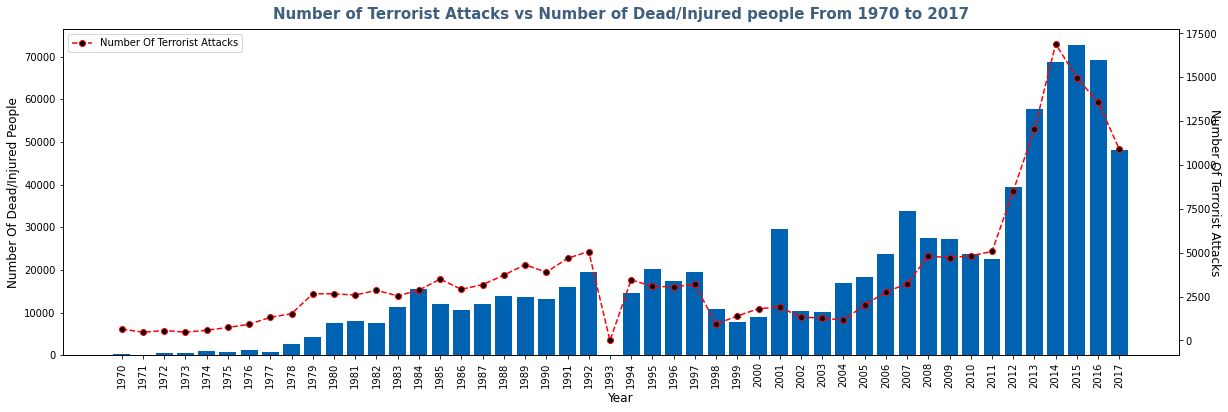

In [58]:
#Filter Data to choose Number Of Dead/Injured People In Terrorist Attacks From 1970 to 2017
people_damage = data[["Year","Damage"]].groupby('Year').sum()
list_year =  data["Year"].unique().tolist()

#draw bar chart
fig, ax1 = plt.subplots(figsize = (20,6))
ax1.bar(people_damage.index, [i[0] for i in people_damage.values], color= '#0063B1' )

ax1.set_xticklabels(np.arange(1970, 2018, step=1), rotation=90)
ax1.set_ylabel('Number Of Dead/Injured People', size = 12)
ax1.set_xlabel('Year', size = 12)
ax1.set_title('Number of Terrorist Attacks vs Number of Dead/Injured people From 1970 to 2017', fontsize= 15, pad= 10, weight ='bold', 
                    color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
ax2 = ax1.twinx()

#Filter & get a number of attacked in the world from 1970 to 2017 
number_attack = []
for year in list_year:
    number_attack.append(len(data[data['Year'] == year][["Year"]]))
number_attack.insert(23, 0)

#draw plot chart
ax2.set_ylabel('Number Of Terrorist Attacks', size = 12,rotation=-90)
ax2.plot(range(1970, 2018), number_attack, 'r--o', mfc='k', label='Number Of Terrorist Attacks')

plt.xticks(np.arange(1970, 2018, step=1))
plt.legend(loc='upper left')
plt.show()

### Analyse the Terrorist attack types and Damage

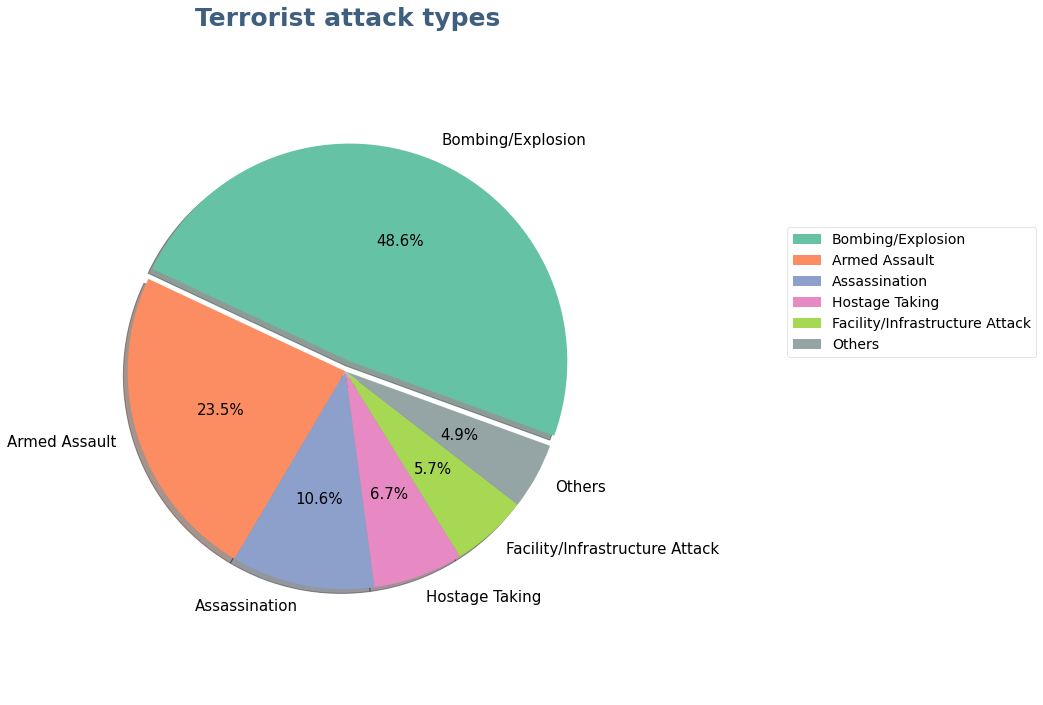

In [ ]:
atk_filtered =data['Attacktype'].apply(lambda x: x if x in ['Bombing/Explosion','Armed Assault','Assassination',
                                                            'Hostage Taking',
                                                            'Facility/Infrastructure Attack'] else 'Others')
attack_type = atk_filtered.value_counts().tolist()

# Pie chart of Terrorist attack types
labels = ['Bombing/Explosion','Armed Assault','Assassination',
          'Hostage Taking','Facility/Infrastructure Attack','Others']

sizes = []

for i in attack_type:
    percent = i*100/len(data['Attacktype'])
    sizes.append(percent)

fig, ax = plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle = -20, shadow = True,
        explode = (0.05, 0, 0, 0, 0, 0),
        colors = sns.color_palette("Set2", 8)[:5]+[(0.5843137254901962, 0.6470588235294118, 0.6509803921568628)],
        textprops={'fontsize':15,'weight':'light','color':'k'})

ax.axis('equal')
plt.title('Terrorist attack types', fontsize= 25, pad= -70, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) #pad change the distance from title to graph
plt.tight_layout()
ax.legend(loc='lower right',framealpha = 0.5,bbox_to_anchor=(1.8,0.5,0.1,1), prop={'size': 14})
fig.show()

In [ ]:
# Create table_1 about Attack types and number of Dead/Injured People

cat = ['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack']
color_cat = sns.color_palette("Set2", 8)[:5]
color_cat_dict = dict(zip(cat, color_cat))

table_1 = data[['Attacktype','Damage']].groupby('Attacktype',as_index = False).sum().sort_values(by='Damage', ascending=False)
table_1 = table_1.reset_index()

inci = [88255,42669,7276,19312,12149,659,1015,10356]
table_1["Incidents"] = np.array(inci)

table_1["Damage_rate"] = table_1["Damage"]/table_1["Incidents"]
table_1

,index,Attacktype,Damage,Incidents,Damage_rate
0,2,Bombing/Explosion,514233.0,88255,5.826673
1,0,Armed Assault,212386.0,42669,4.977525
2,7,Unknown,39606.0,7276,5.443375
3,1,Assassination,37209.0,19312,1.926729
4,5,Hostage Taking,27732.0,12149,2.282657
5,4,Hijacking,20642.0,659,31.323217
6,6,Unarmed Assault,14791.0,1015,14.572414
7,3,Facility/Infrastructure Attack,6293.0,10356,0.607667


## Data analysis on the dataset for Finding the HOT ZONE of terrorism

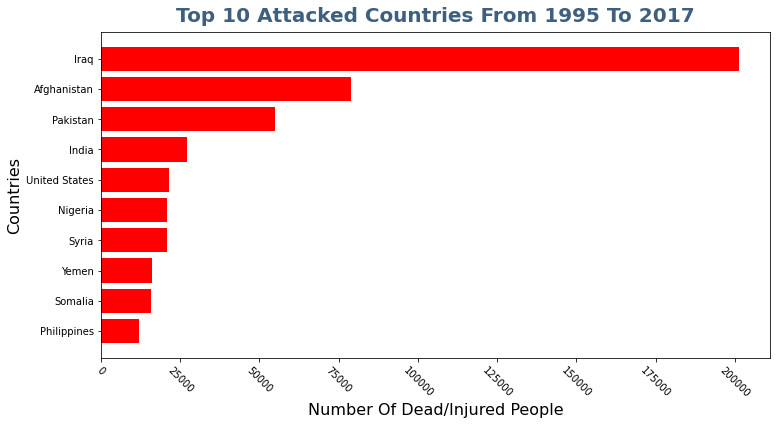

In [56]:
#Choose comlumn Country and Damage from data
country_damage = data[data['Year'] > 1999][["Country", "Damage"]].groupby('Country',as_index=False).sum()
data_paint = country_damage.sort_values(by='Damage', ascending = False).head(10)

#Paint the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(data_paint["Country"][::-1], data_paint["Damage"][::-1], color = 'red')
plt.xticks(rotation=-45)
ax.set_ylabel('Countries', size=16)
ax.set_xlabel('Number Of Dead/Injured People', size=16)
plt.title("Top 10 Attacked Countries From 1995 To 2017", fontsize= 20, pad= 10, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.show()

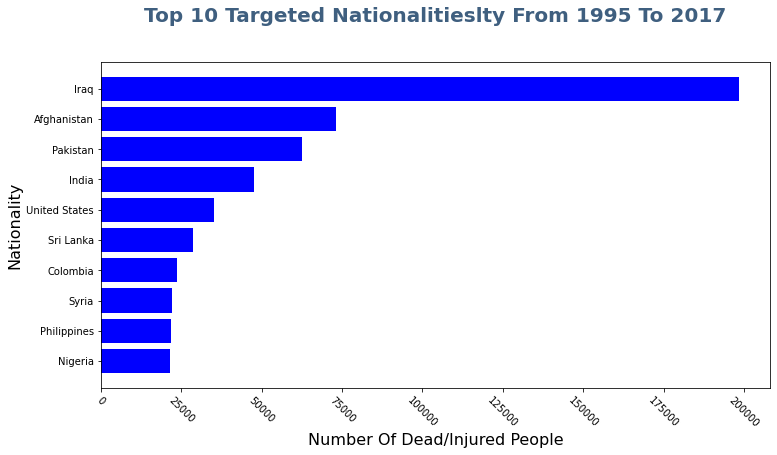

In [ ]:
#Choose comlumn Country and Damage from data
nalty_damage = data[["Natlty1", "Damage"]].groupby('Natlty1', as_index=False).sum()
data_paint_natlty = nalty_damage.sort_values(by='Damage', ascending = False).head(10)
fig, ax = plt.subplots(figsize=(12, 6))

#Paint bar chart
ax.barh(data_paint_natlty["Natlty1"][::-1], data_paint_natlty["Damage"][::-1], color = 'blue')
plt.xticks(rotation=-45)
ax.set_ylabel('Nationality', size=16)
ax.set_xlabel('Number Of Dead/Injured People', size=16)
plt.title("Top 10 Targeted Nationalitieslty From 1995 To 2017", fontsize= 20, pad= 40, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])

plt.show()

In [ ]:
def country_nationality(n):
  
    """
    Function to draw the bar charts 
    of Top 10 Attacked Countries and Top 10 Targeted Nationalities 
    """

    #Filter data and choose Top 10 Attacked Countries
    top10_bad = data[data['Year'] == n][["Country", "Damage"]].groupby('Country',as_index=False).sum()
    data_paint = top10_bad.sort_values(by='Damage', ascending = False).head(10)

    #Paint bar chart
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))

    ax[0].barh(data_paint["Country"][::-1], data_paint["Damage"][::-1], color = ['red', 'blue', 'green', '#34465D', '#df2029', '#FFFC00', '#E4405F', '#3B5999', '#00c300', '#ff0084'])
    ax[0].set_ylabel('Countries', size=16)
    ax[0].set_xlabel('Number Of Dead/Injured People', size=16)
    ax[0].set_title("Top 10 Attacked Countries %d" % n, fontsize= 15, pad= 10, weight ='bold', 
                  color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
    plt.subplots_adjust(wspace=0.3)
    #Filter data and choose Top 10 Targeted Nationalities    
    nalty_damage = data[["Natlty1", "Damage"]].groupby('Natlty1', as_index=False).sum()
    data_paint_natlty = nalty_damage.sort_values(by='Damage', ascending = False).head(10)

    #Paint bar chart
    ax[1].barh(data_paint_natlty["Natlty1"][::-1], data_paint["Damage"][::-1], color = ['red', 'blue', 'green', '#34465D', '#df2029', '#131418', '#AF0606', '#0084ff', '#ff6600', '#410093'])
    ax[1].set_xlabel('Number Of Dead/Injured People',size=16)
    ax[1].set_ylabel('Nationalities', size=16)
    ax[1].set_title("Top 10 Targeted Nationalities %d" % n, fontsize= 15, pad= 10, weight ='bold', 
                  color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
    for ax in fig.axes:
        plt.sca(ax)
    plt.show()

In [ ]:
list_year = []
for year in range(1970,1993): list_year.append(year)
for year in range(1994,2018): list_year.append(year)

for year in list_year:
    country_nationality(year)
    time.sleep(2)
    clear_output()

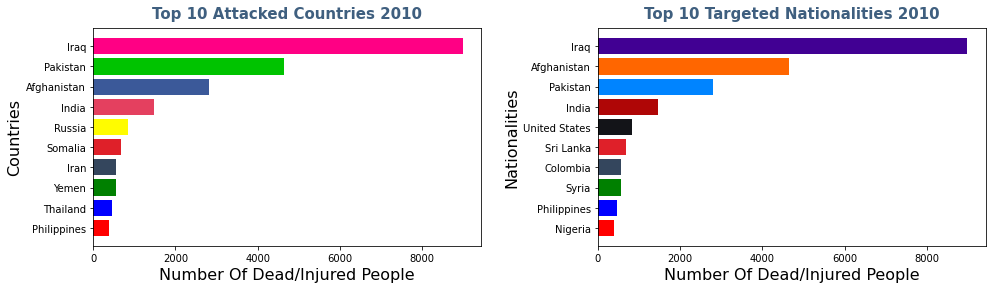

In [ ]:
country_nationality(2010)



Input the Year you want to see chart! (1970 -2017): 2000


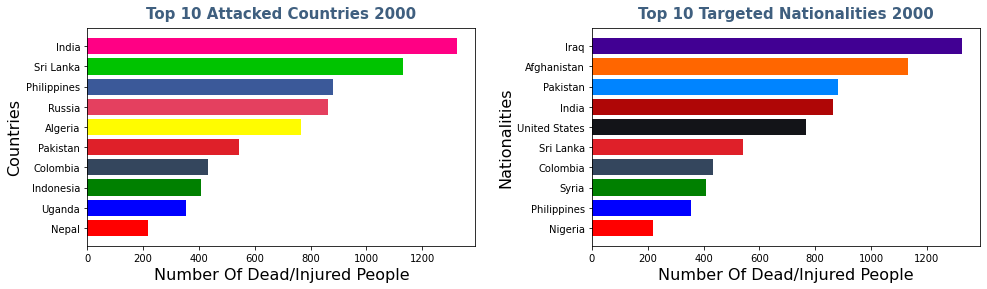

In [59]:
def country_nationality_year():
    """
    Function to paint chart with specific input year
    """

  # Input year. Try if it in list_year
    try:
        year = int(input ('Input the Year you want to see chart! (1970 -2017): '))
        if year == 1993:
            print('Sorry, No Terrorism Data in 1993')
            year = int(input ('Input the Year you want to see chart! (1970 -2017): '))
        while year not in list_year:
            print("Please Input the year from 1970 to 2017")
            year = int(input('Input the Year you want to see chart! (1970 -2017): '))

  #When have error, print error and call function timseri_year
    except (ValueError, ZeroDivisionError) as ex:  # Called when have error typing
        print("Wrong type, input again: ")
        country_nationality_year()

  #when don't have error: 
    else:
       #print chart with function timeseri(year)
        country_nationality(year)
country_nationality_year()

In [60]:


data.to_csv("CleanData.csv",index=False)



## As per the Data Analysis on the Datasets as a Defense analyst,The Hot Zone for Terrorism is IRAQ 